In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import tifffile as tif
from os import listdir
from os.path import isfile, join
from pathlib import Path
from cellpose import io, models

In [2]:
BASE_PATH = "/bigdata/casus/MLID/180301-VA-dE3B-TC-6"

In [3]:
def read_tiff(path: str) -> np.ndarray:
    im_stack = tif.imread(path)
    if len(im_stack.shape) == 4:
        im_stack = im_stack[:, 0]

    return im_stack

def get_percentiles(x):
    mi = np.percentile(x, 3, axis=None)
    ma = np.percentile(x, 99.8, axis=None)
    return mi, ma

def read_data(channel):
    paths_w1 = list(Path(BASE_PATH).glob("**/TimePoint_49" + f"/*_w{str(channel)}.tif"))
    n_sequences = len(paths_w1)
    data = []
    for idx in tqdm(range(n_sequences)):
        w1_path = str(paths_w1[idx])
        w1_ch = np.expand_dims(read_tiff(w1_path), -1) / 65535.0
        data.append(w1_ch)
    data = np.array(data, dtype=np.float32)
    return data

def hist(imgs):
    imgs = (imgs*255).astype(np.uint8)
    unique, counts = np.unique(imgs, return_counts=True)
    all_counts = np.zeros(np.max(unique)+1)
    all_counts[unique] = counts
    
    plt.figure(figsize=(12,12))
    plt.stairs(all_counts)
    plt.yscale('log')
    plt.xlim(0, np.max(unique)+1)

In [4]:
data = read_data(1)
get_percentiles(data)

100%|██████████| 588/588 [00:30<00:00, 19.33it/s]


(0.003524834057316184, 0.017792019993066788)

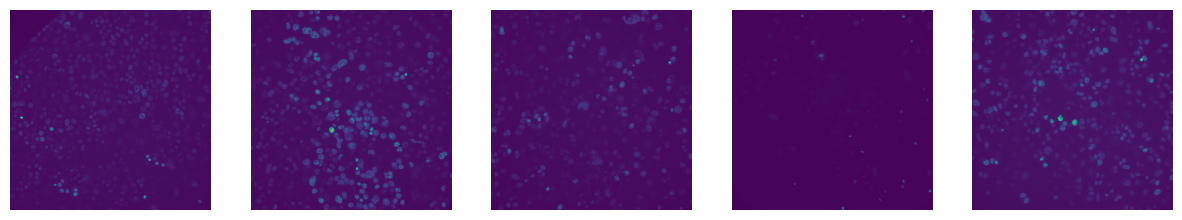

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(data[i])
    axes[i].axis('off')  

plt.show()

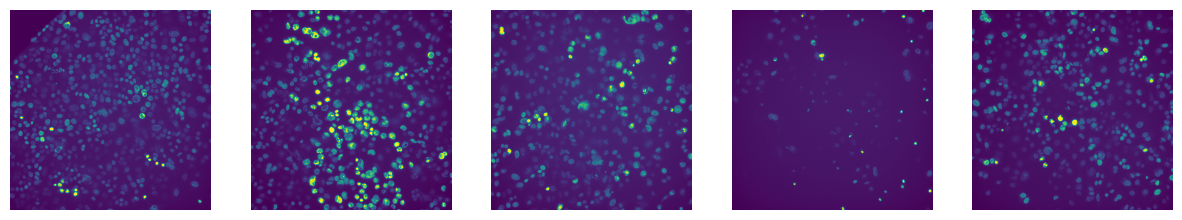

In [6]:
min_p=0.0035
max_p=0.0178

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    d = (data[i] - min_p) / (max_p - min_p)
    d = np.clip(d, 0, 1)
    axes[i].imshow(d)
    axes[i].axis('off')  

plt.show()

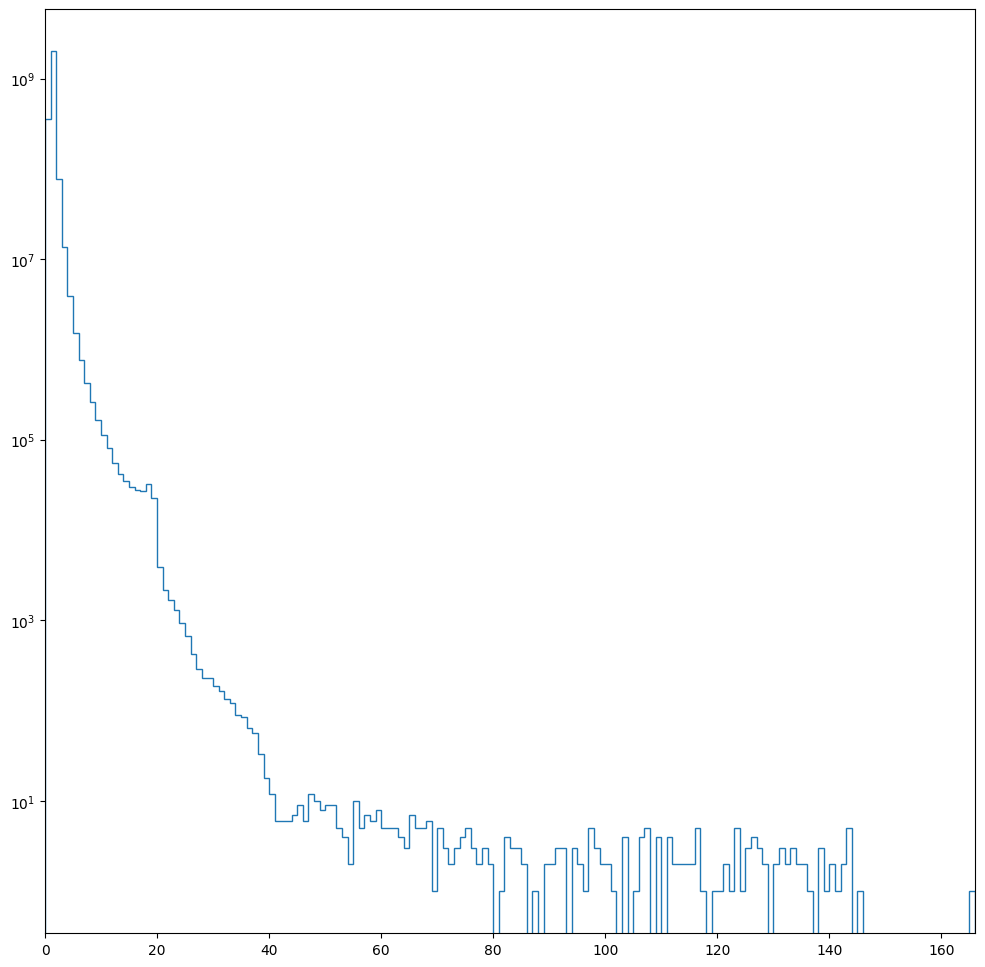

In [7]:
hist(data)

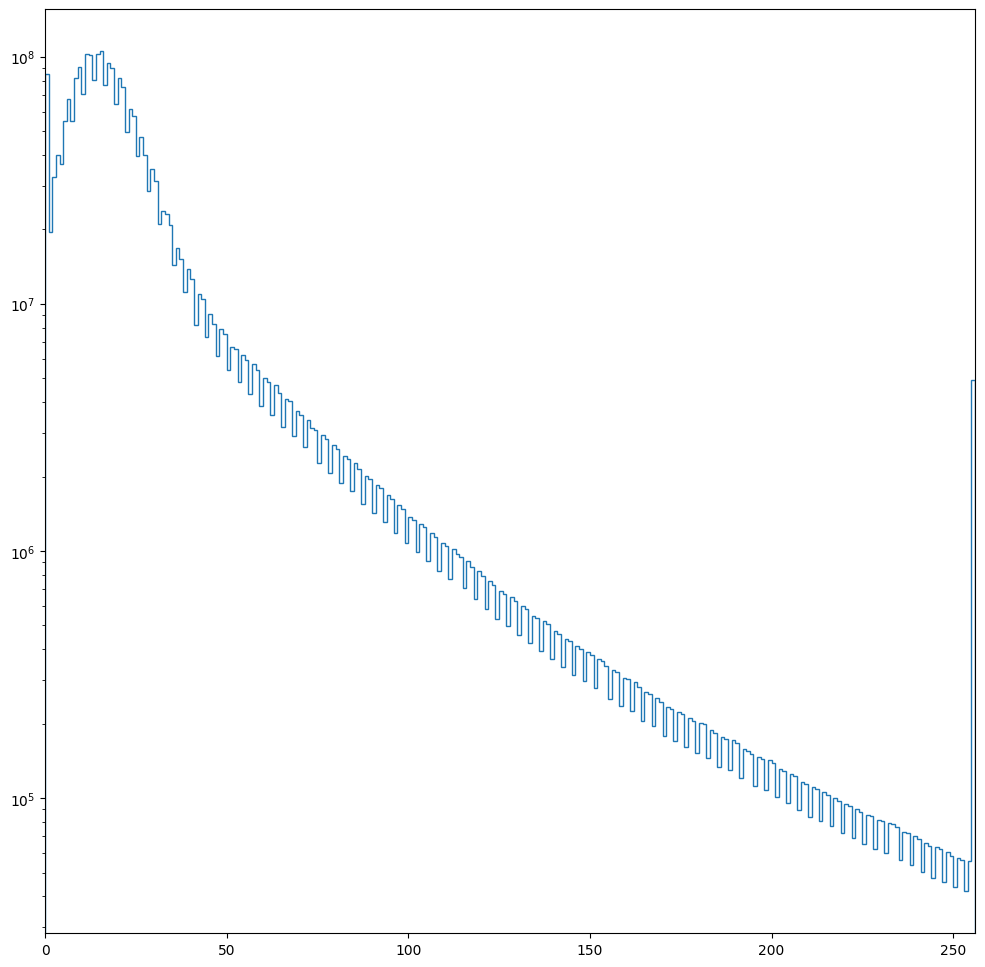

In [8]:
data_norm = (data - min_p) / (max_p - min_p)
data_norm = np.clip(data_norm, 0, 1)
hist(data_norm)

In [9]:
data = read_data(2)
get_percentiles(data)

100%|██████████| 588/588 [00:30<00:00, 19.43it/s]


(0.010376134887337685, 0.07406729459762573)

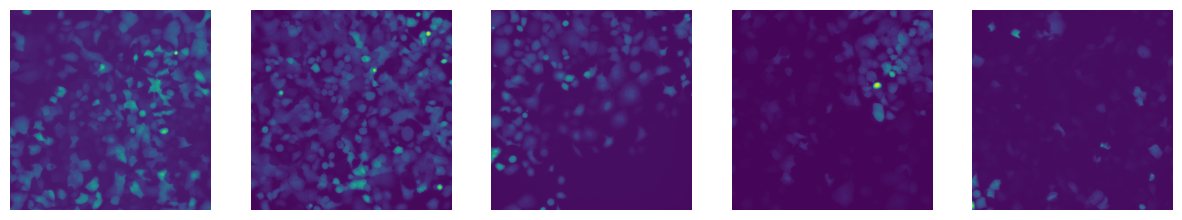

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(data[i])
    axes[i].axis('off')  

plt.show()

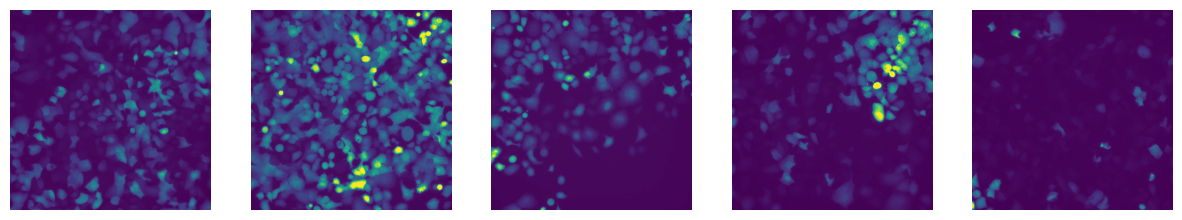

In [11]:
min_p=0.0104
max_p=0.0741

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    d = (data[i] - min_p) / (max_p - min_p)
    d = np.clip(d, 0, 1)
    axes[i].imshow(d)
    axes[i].axis('off')  

plt.show()

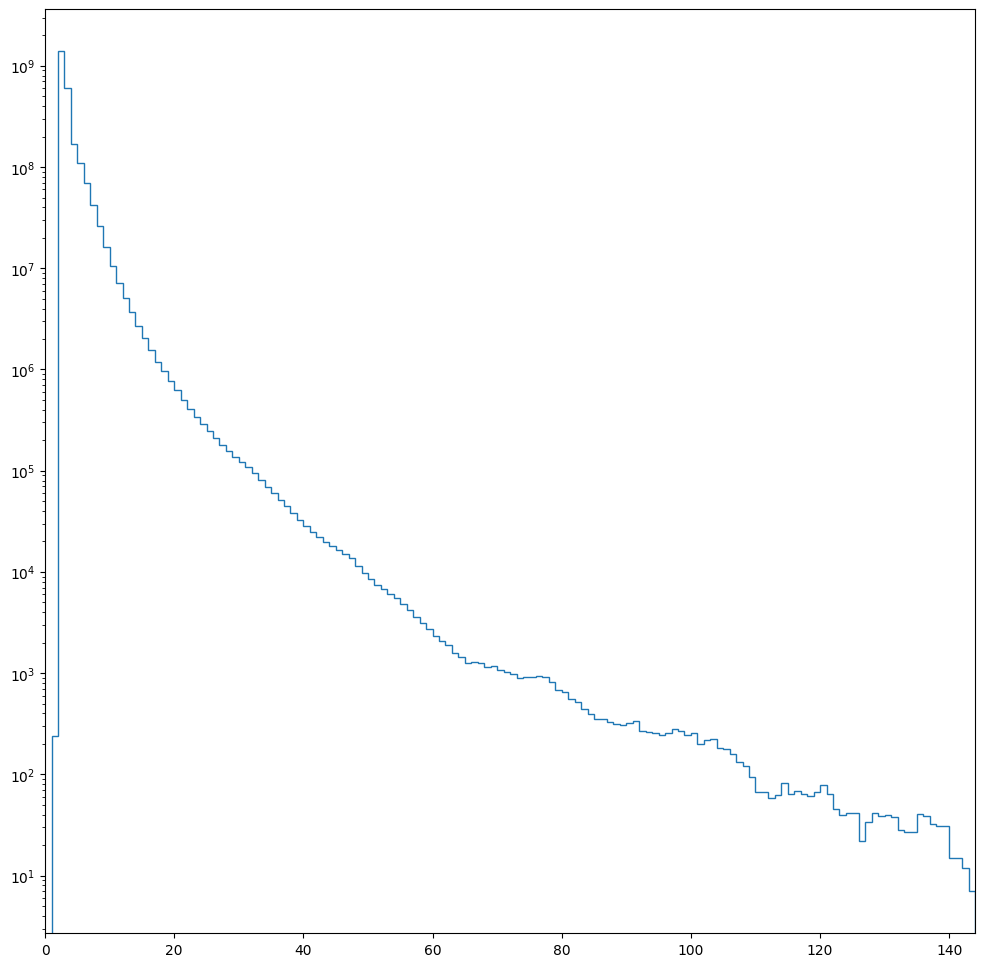

In [12]:
hist(data)

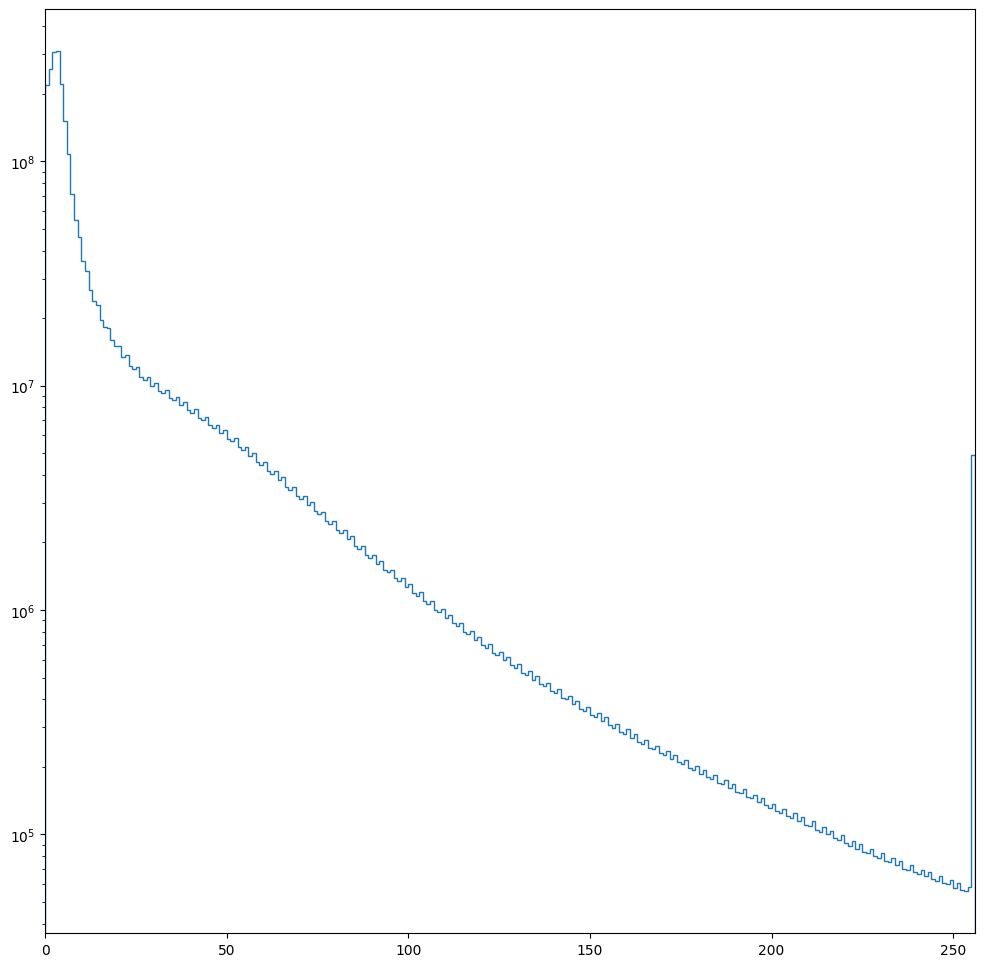

In [13]:
data_norm = (data - min_p) / (max_p - min_p)
data_norm = np.clip(data_norm, 0, 1)
hist(data_norm)

In [14]:
data = read_data(4)
get_percentiles(data)

100%|██████████| 588/588 [00:29<00:00, 19.72it/s]


(0.13386739790439606, 0.3829861879348755)

In [4]:
data = read_data(4)

100%|██████████| 588/588 [00:35<00:00, 16.44it/s]


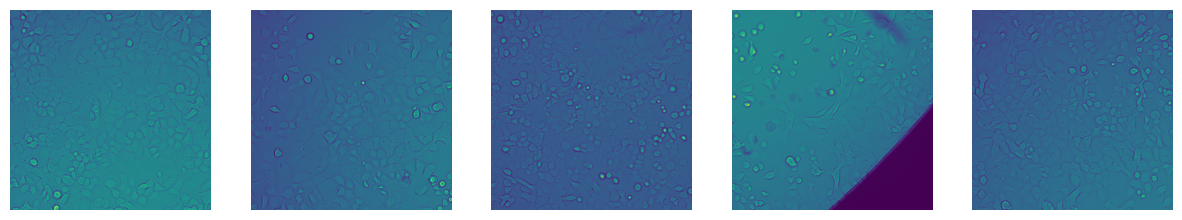

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(data[i])
    axes[i].axis('off')  

plt.show()

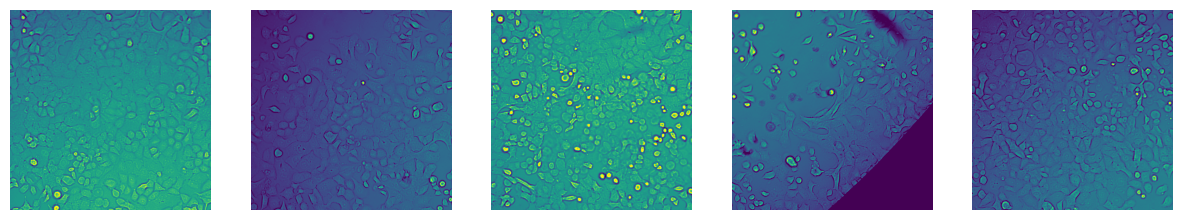

In [16]:
min_p=0.1339
max_p=0.3830

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    d = (data[i] - min_p) / (max_p - min_p)
    d = np.clip(d, 0, 1)
    axes[i].imshow(d)
    axes[i].axis('off')  

plt.show()

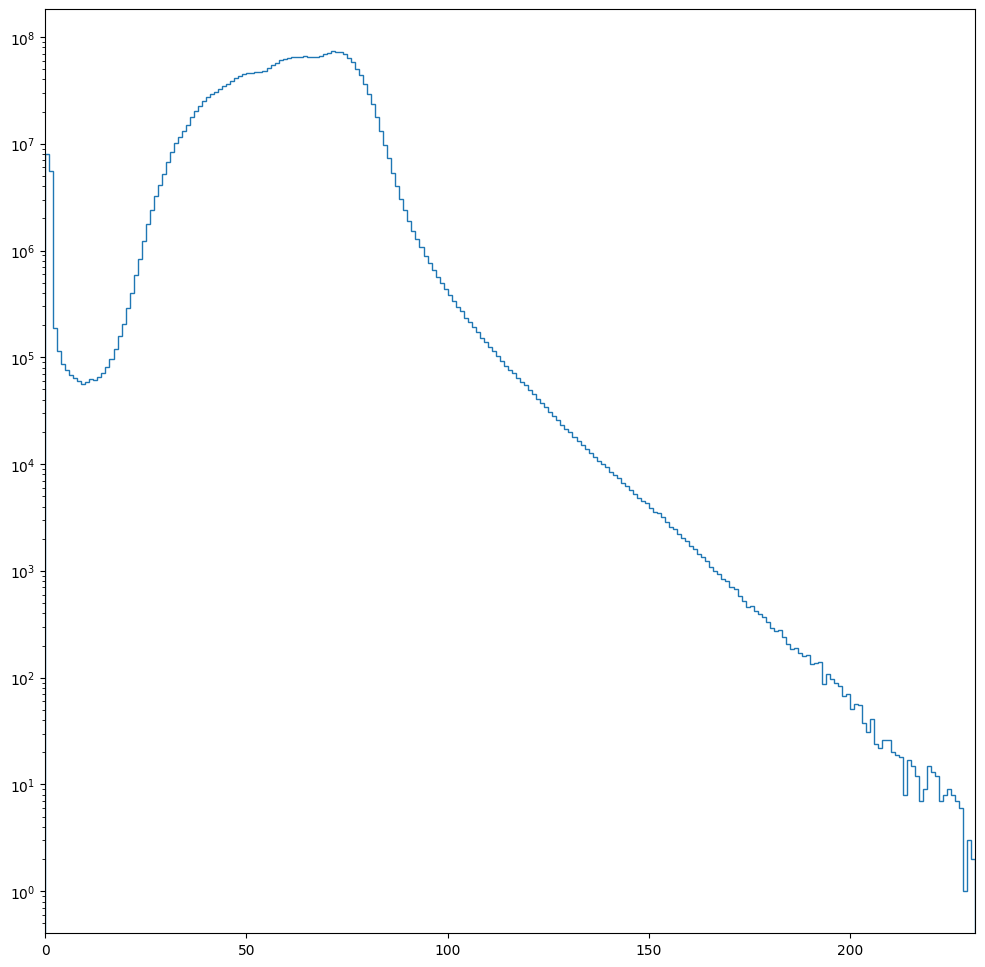

In [17]:
hist(data)

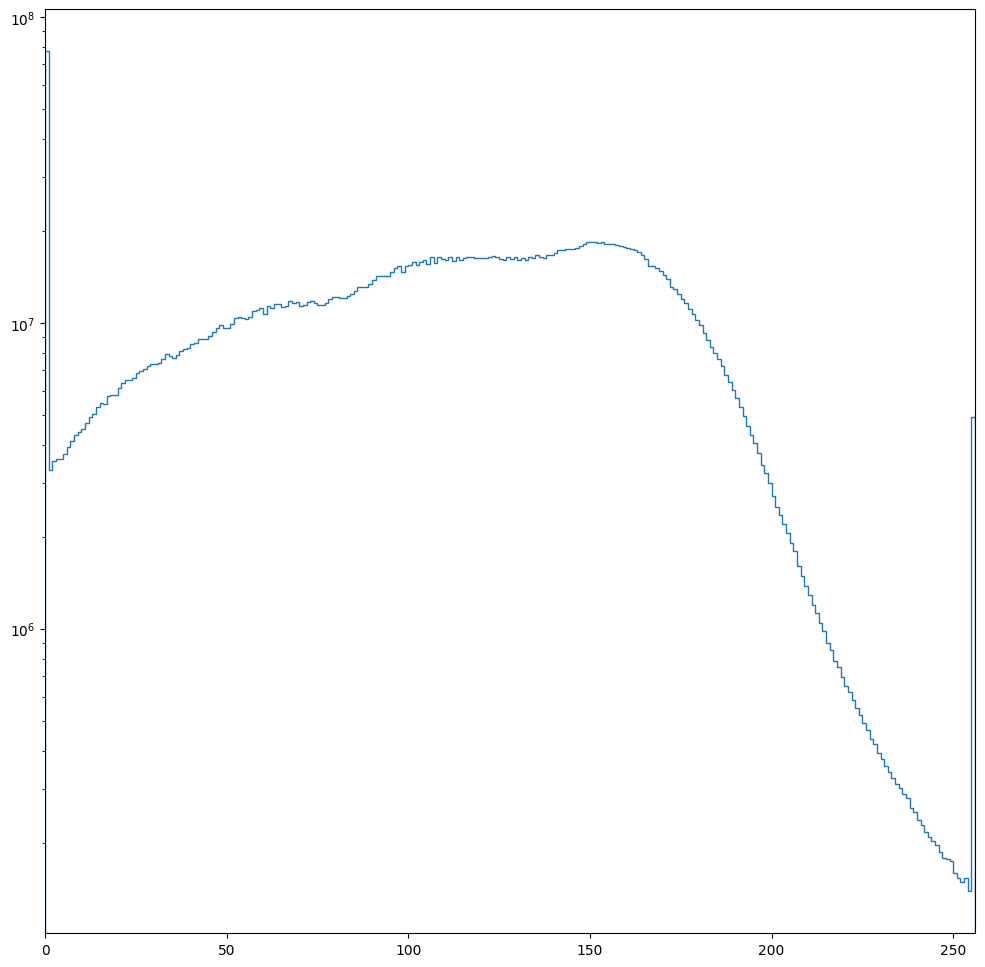

In [18]:
data_norm = (data - min_p) / (max_p - min_p)
data_norm = np.clip(data_norm, 0, 1)
hist(data_norm)

In [30]:
print(np.percentile(data, 0.1, axis=None), np.percentile(data, 99.9, axis=None))

0.003219653619453311 0.40888074040412903


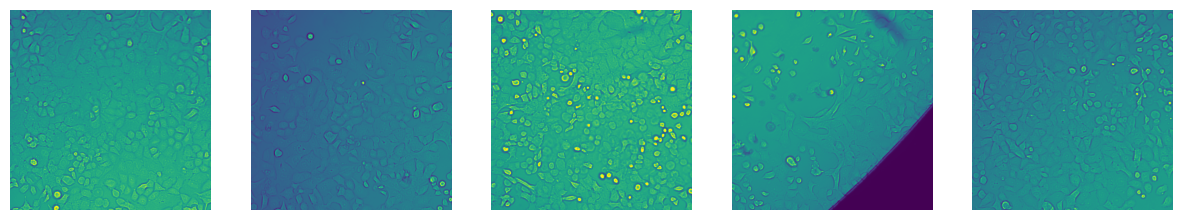

In [31]:
min_p=0.0032
max_p=0.4089

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    d = (data[i] - min_p) / (max_p - min_p)
    d = np.clip(d, 0, 1)
    axes[i].imshow(d)
    axes[i].axis('off')  

plt.show()

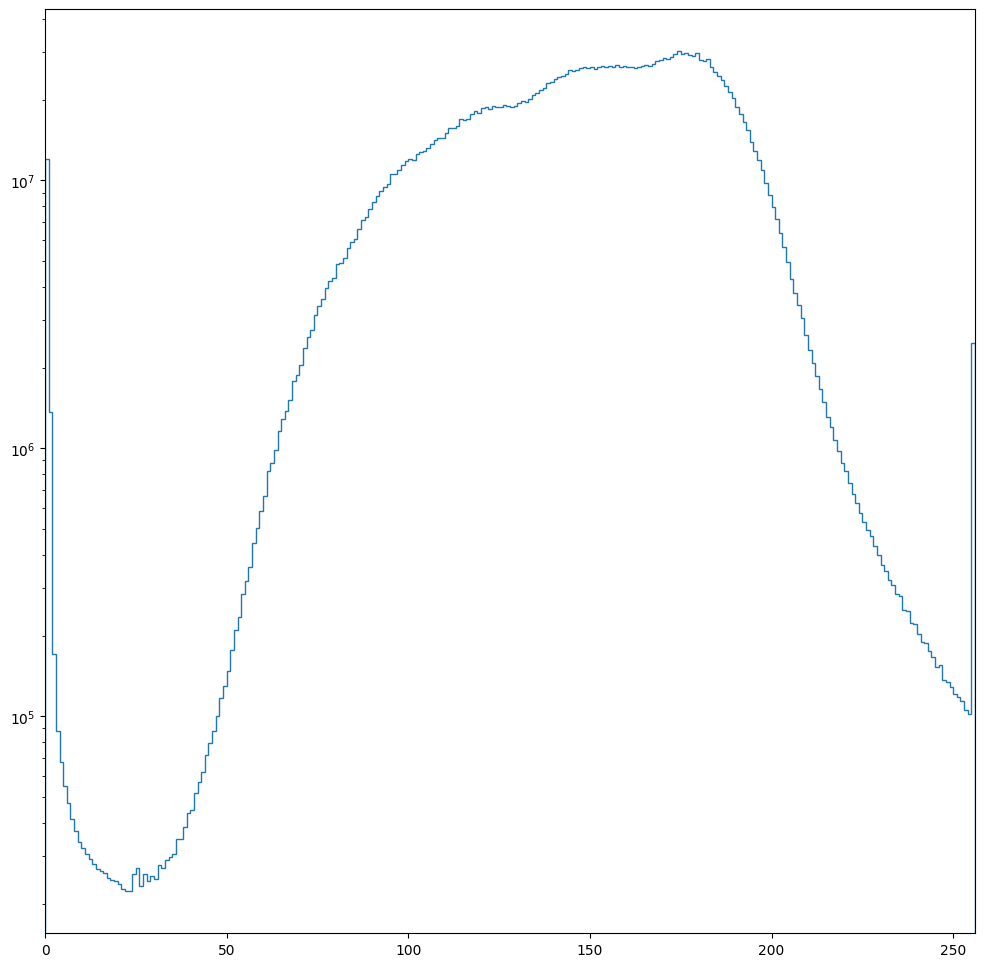

In [32]:
data_norm_2 = (data - min_p) / (max_p - min_p)
data_norm_2 = np.clip(data_norm_2, 0, 1)
hist(data_norm_2)

In [34]:
model = models.CellposeModel(model_type="cyto3")

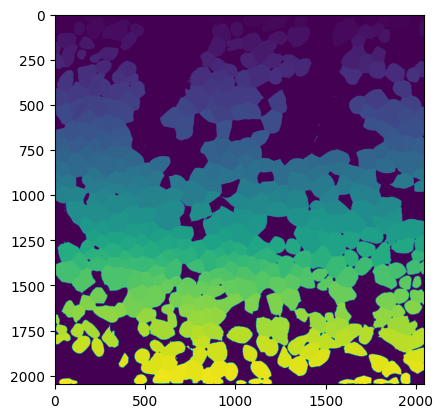

In [21]:
masks_pred, flows, _ = model.eval(data[0], channels=[0, 0], diameter=70)
plt.imshow(masks_pred)

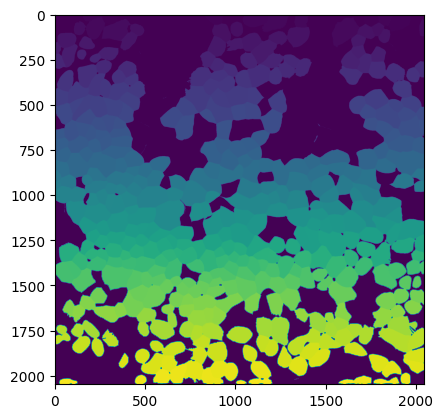

In [22]:
masks_pred, flows, _ = model.eval(data_norm[0], channels=[0, 0], diameter=70)
plt.imshow(masks_pred)

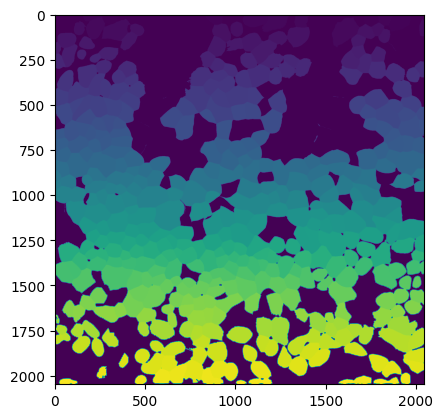

In [33]:
masks_pred, flows, _ = model.eval(data_norm_2[0], channels=[0, 0], diameter=70)
plt.imshow(masks_pred)

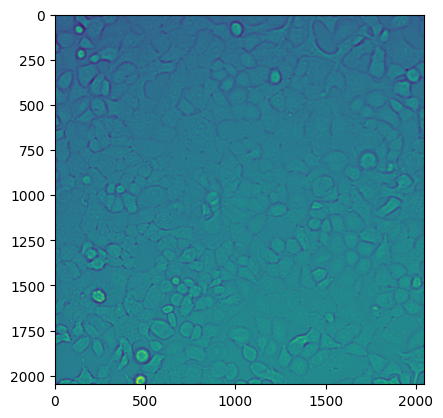

In [26]:
plt.imshow(data[0])

In [34]:
path = "/bigdata/casus/MLID/maria/HADV_normalized_final/processed_original_size/test"
filenames = [f for f in listdir(join(path, "x")) if isfile(join(path, "x", f))]
masks = []
for f in filenames:
    masks.append(np.load(join(path, "masks", f.replace(".tif", ".npy"))))

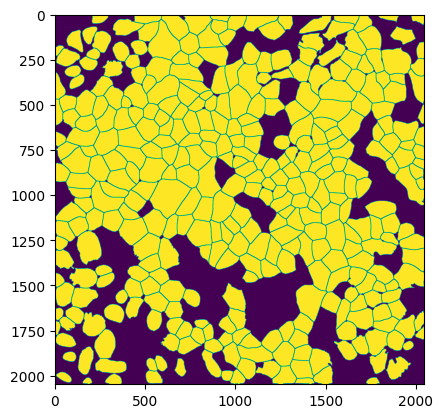

In [36]:
import cv2
import numpy as np
import os

def shrink_and_binarize_masks(image):
    
    # Get unique mask values (excluding the background value 0)
    unique_values = np.unique(image)
    unique_values = unique_values[unique_values != 0]
    
    # Create an empty image for the output
    binary_image = np.zeros_like(image)
    
    # Process each unique mask value
    for value in unique_values:
        # Create a binary mask for the current value
        mask = np.uint8(image == value) * 255
        
        # Shrink the mask by eroding it with a 3x3 kernel
        kernel = np.ones((3, 3), np.uint8)
        eroded_mask = cv2.erode(mask, kernel, iterations=1)
        
        # Add the eroded mask to the binary image
        binary_image[eroded_mask > 0] = 1

    return binary_image

plt.imshow(shrink_and_binarize_masks(masks[22]))

In [20]:
for split in ["train", "val", "test"]:
    path = f"/bigdata/casus/MLID/maria/HADV_normalized_final/processed_original_size/{split}"
    os.makedirs(join(path, "masks_binarized"), exist_ok=True)
    filenames = [f for f in listdir(join(path, "x")) if isfile(join(path, "x", f))]
    for f in tqdm(filenames):
        mask = np.load(join(path, "masks", f.replace(".tif", ".npy")))
        binarized_mask = shrink_and_binarize_masks(mask)
        np.save(join(path, "masks_binarized", f.replace(".tif", ".npy")), binarized_mask)

100%|██████████| 59/59 [02:06<00:00,  2.14s/it]


In [ ]:
for split in ["train", "val", "test"]:
    path = f"/bigdata/casus/MLID/maria/HADV_normalized_final/processed_original_size/{split}"
    os.makedirs(join(path, "masks_binarized"), exist_ok=True)
    filenames = [f for f in listdir(join(path, "x")) if isfile(join(path, "x", f))]
    for f in tqdm(filenames):
        mask = np.load(join(path, "masks", f.replace(".tif", ".npy")))
        binarized_mask = shrink_and_binarize_masks(mask)
        np.save(join(path, "masks_binarized", f.replace(".tif", ".npy")), binarized_mask)